In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('out.csv',sep=',', header=None)

In [3]:
df.drop(0, axis=1, inplace=True)

In [4]:
df.rename(dict(df.iloc[0]),axis=1,inplace=True)

In [5]:
df.drop(0,inplace=True)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0,146,2,4
2,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.65,140,2,4
3,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542000000000005,146,2,4
4,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.075,146,2,4
5,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0,38,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,146,0,4
888,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,146,0,4
889,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,146,2,3
890,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,32.0,0,0,349215,7.8958,146,2,4


In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [8]:
df.Pclass = df['Pclass'].astype(int)
df.Fare = df['Fare'].astype(float)
df.Age = df['Age'].astype(float)
df.Cabin = df['Cabin'].astype(int)
df.SibSp = df['SibSp'].astype(int)
df.Parch = df['Parch'].astype(int)
df.Survived = df['Survived'].astype(int)
df.Sex = df['Sex'].astype(int)
df.Embarked =df['Embarked'].astype(int)
df.Title =df['Title'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int32  
 7   Parch        891 non-null    int32  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
 12  Title        891 non-null    int32  
dtypes: float64(2), int32(8), object(3)
memory usage: 69.6+ KB


# Regression Logistic

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Pclass","Sex","Embarked","SibSp","Title"] 
X = df[cols]
y = df['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Pclass', 'Sex', 'Title']


Optimal number of features: 6
Selected features: ['Age', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Title']


C:\opt\anaconda\envs\ds\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


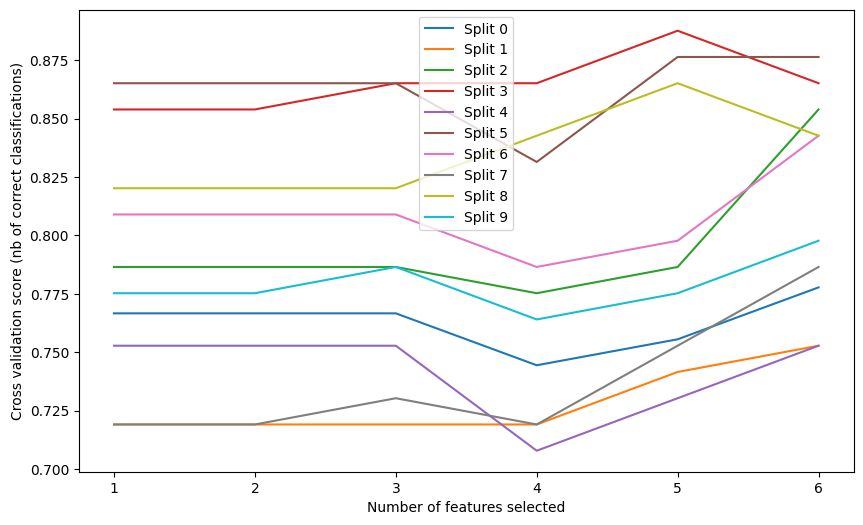

In [11]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.legend([f"Split {i}" for i in range(10)])
plt.show()

In [12]:
dir(rfecv)
rfecv.cv_results_

{'mean_test_score': array([0.78677903, 0.78677903, 0.79014981, 0.77556804, 0.79690387,
        0.81485643]),
 'std_test_score': array([0.04808092, 0.04808092, 0.04807567, 0.0527642 , 0.05562049,
        0.04423441]),
 'split0_test_score': array([0.76666667, 0.76666667, 0.76666667, 0.74444444, 0.75555556,
        0.77777778]),
 'split1_test_score': array([0.71910112, 0.71910112, 0.71910112, 0.71910112, 0.74157303,
        0.75280899]),
 'split2_test_score': array([0.78651685, 0.78651685, 0.78651685, 0.7752809 , 0.78651685,
        0.85393258]),
 'split3_test_score': array([0.85393258, 0.85393258, 0.86516854, 0.86516854, 0.88764045,
        0.86516854]),
 'split4_test_score': array([0.75280899, 0.75280899, 0.75280899, 0.70786517, 0.73033708,
        0.75280899]),
 'split5_test_score': array([0.86516854, 0.86516854, 0.86516854, 0.83146067, 0.87640449,
        0.87640449]),
 'split6_test_score': array([0.80898876, 0.80898876, 0.80898876, 0.78651685, 0.79775281,
        0.84269663]),
 'spli

In [13]:
 
from sklearn.model_selection import train_test_split
cols = ["Age","Pclass","Sex","Embarked","SibSp","Title"]
X = df[cols]
Y = df["Survived"]

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

In [51]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty="l2",C=1.0,solver="liblinear").fit(x_train,y_train)

In [52]:
y_pred = logistic_model.predict(x_test)

In [53]:
pred_results = pd.DataFrame({"y_test": y_test,
                            "y_pred": y_pred})
pred_results.head(10)

,y_test,y_pred
591,0,0
132,1,1
629,1,0
196,0,0
231,0,1
647,0,0
76,0,0
587,0,0
570,0,0
288,0,0


In [54]:
print("Training set score: {:.3f}".format(logistic_model.score(x_train,y_train)))
print("Test set score: {:.3f}".format(logistic_model.score(x_test,y_test)))

Training set score: 0.807
Test set score: 0.803


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [55]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score:",acc)
print("precision_score:", prec)
print("recal_score:", recall)

accuracy_score: 0.8026905829596412
precision_score: 0.7948717948717948
recal_score: 0.6888888888888889


In [20]:
results = {"algorithms":[],"accuracy":[]}
results["algorithms"].append("logistic regression")
results["accuracy"].append(accuracy_score(y_test,y_pred))

In [56]:
from sklearn import metrics

In [57]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,y_pred)))

Confusion Matrix
[[117  16]
 [ 28  62]]


Here, confusion matrix tells us that:

16 passengers who did not survive are wrongly predicted as survivors (False Positives)

28 passengers who survived are wrongly predicted as dead (False Negatives)

117 passengers who died also predicted as dead (True Positives)

62 passengers who survived are also predicted as survivors (True Negatives)

Accuracy: How many correct predictions have we made from all the observations? Accuracy = (TP+TN)/(TP+FP+FN+TN)= 80.26%

Recall: Out of all the passengers that died, how many did we get correct? Recall = TP/(TP+FN)= 80.6%

Precision: Out of all the passengers that we predicted to be dead, how many did we actually get right? Precision= TP/(TP+FP)= 87.9%

In [23]:
print("The model's sensitivity is ",62/(62+28),"so, 64.5% of passengers who survived the iceberg accident were correctly predicted")
print("the model's specificity is",117/(117+16),"which means that 87.9% of unsurvived passengers were correctly predicted")

The model's sensitivity is  0.6666666666666666 so, 66.66% of passengers who survived the iceberg accident were correctly predicted
the model's specificity is 0.8017241379310345 which means that 80.17% of unsurvived passengers were correctly predicted


In addition to our model's sensitivity and specificty, AUC/ROC matrix is very useful to express whether our model is a skilfull one or not and so to validate it. In fact, it is a plot of the false positive rate (on the x axis)(1-specificty) versus the true positive one (on the y axis)(sensitivity) using for each point a specific threshold. Indeed, the bigger is the Area Under Curve (AUC) of the Receiver Operating Characteristics (ROC) (>0.5) the more skilfull is our model and vice versa.This can logically help us choose the best classification model and threshold.This can be explained by the fact of having a good sensitivity rate when obtaining a large area under the curve and also a low FPR (and so an important sensitivity rate since FPR=1-sensitvity).

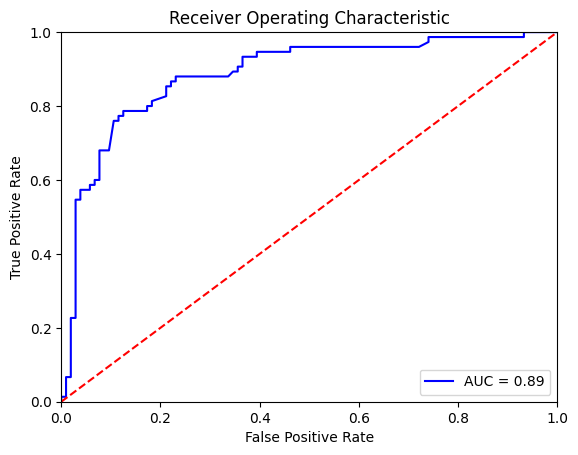

In [24]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logistic_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC_AUC_score for Logistic Regression:  0.8855128205128205


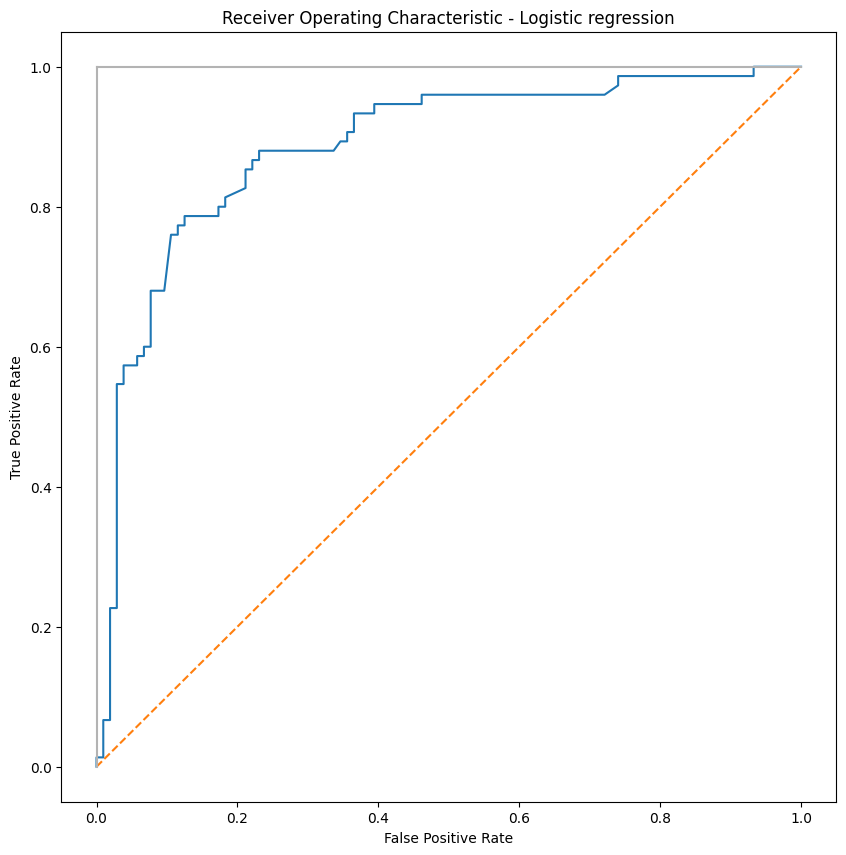

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
# Creating False and True Positive Rates and printing Score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, preds)
print('ROC_AUC_score for Logistic Regression: ', roc_auc_score(y_test, preds))
# Plot's size
plt.subplots(1, figsize=(10,10))
# Plot's title 
plt.title('Receiver Operating Characteristic - Logistic regression')
# Plot ROC Curve 
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# axis labels
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# show the plot
plt.show()

Notre modèle peut être considéré comme habile puisque son AUC est assez grande (0,81). Cette mesure ajoutée aux taux de sensibilité et de spécificité peut faire de nous le modèle appliqué comme un bon modèle.

# KNN

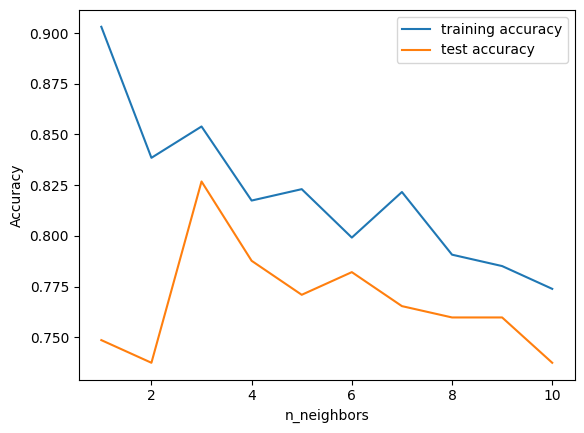

In [26]:
# 
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

#try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    
#build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    
#record training set accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    
#record test set accuracy
    test_accuracy.append(knn.score(x_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_compare_model")

In [27]:
print("Accuracy of k-NN classifier on training set: {:.2f}".format(knn.score(x_train,y_train)))
print("Accuracy of K-NN classifier on test set: {:.2f}".format(knn.score(x_test,y_test)))

Accuracy of k-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.74


In [28]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)
print("Accuracy of k-NN classifier on training set: {:.2f}".format(knn.score(x_train,y_train)))
print("Accuracy of K-NN classifier on test set: {:.2f}".format(knn.score(x_test,y_test)))

Accuracy of k-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.68


In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("Accuracy of k-NN classifier on training set: {:.2f}".format(knn.score(x_train,y_train)))
print("Accuracy of K-NN classifier on test set: {:.2f}".format(knn.score(x_test,y_test)))

Accuracy of k-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.83


In [30]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier (n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
print(scores)

[0.7486033519553073, 0.7374301675977654, 0.8268156424581006, 0.7877094972067039, 0.770949720670391, 0.7821229050279329, 0.7653631284916201, 0.7597765363128491, 0.7597765363128491, 0.7374301675977654, 0.7318435754189944, 0.7150837988826816, 0.7318435754189944, 0.7094972067039106, 0.7150837988826816, 0.7430167597765364, 0.7318435754189944, 0.7206703910614525, 0.7374301675977654, 0.7206703910614525, 0.7206703910614525, 0.7262569832402235, 0.7094972067039106, 0.6983240223463687, 0.7039106145251397]


Text(0, 0.5, 'testing Accuracy')

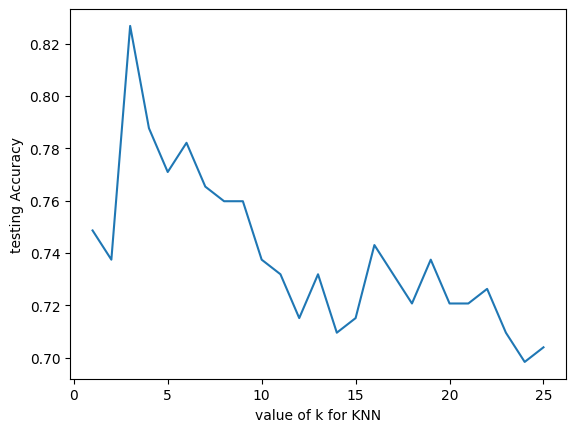

In [31]:
plt.plot(k_range, scores)
plt.xlabel('value of k for KNN')
plt.ylabel('testing Accuracy')

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print("Accuracy of k-NN classifier on training set: {:.2f}".format(knn.score(x_train,y_train)))
print("Accuracy of K-NN classifier on test set: {:.2f}".format(knn.score(x_test,y_test)))

Accuracy of k-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.77


K value equal 5 has the highest accuracy rate. is the optimal nearest neighbor

In [33]:
#Predict with your knn Model
y_predknn = knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_predknn))

0.770949720670391


In [34]:
acc = accuracy_score(y_test,y_predknn)
prec = precision_score(y_test, y_predknn)
recall = recall_score(y_test, y_predknn)

print("accuracy_score: ", acc)
print("precision_score: ", prec)
print("recall_score: ", recall)

accuracy_score:  0.770949720670391
precision_score:  0.7833333333333333
recall_score:  0.6266666666666667


In [35]:

results["algorithms"].append("knn_k=5")
results["accuracy"].append(accuracy_score(y_test,y_predknn))

In [36]:
pred_results_knn = pd.DataFrame({"y_test": y_test,
                            "y_predknn": y_predknn})
pred_results_knn.head(20)

,y_test,y_predknn
260,0,0
738,1,1
612,0,0
292,0,0
654,0,0
427,1,1
311,0,0
885,0,0
400,1,0
236,1,0


# Decision tree

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier



In [38]:
#features extraction
x=df.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= df["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8026905829596412


In [39]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier


In [40]:
model1 = tree.DecisionTreeClassifier(min_samples_split=0.2,max_depth=4,random_state=15)  
model1.fit(x_train, y_train)   #fitting our model
y_predDT=model1.predict(x_test)   # evaluating our model

print("score:{}".format(accuracy_score(y_test, y_predDT)))

score:0.8026905829596412


In [41]:

results["algorithms"].append("Decision tree")
results["accuracy"].append(accuracy_score(y_test, y_predDT))


En changeant quelques paramètres tel que la profondeur , le split... ect On a pu gagné 2% de précision

In [42]:
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model1,
                   feature_names=x.columns.values.tolist(),  
                   class_names="df.Survived.unique()",
                   filled=True)
fig.savefig("tree1.png")
# x.columns.values.tolist()
# df.Survived.unique()

# Random Forest

In [43]:
# 
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [44]:
rf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with n decision trees
rf.fit(x_train, y_train)  #Training our model
y_pred=rf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8430493273542601


In [45]:
rf=RandomForestClassifier(n_estimators=111)  #Creating a random forest with n decision trees
rf.fit(x_train, y_train)  #Training our model
y_pred=rf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.874439461883408


En changeant le nombre d'abre de décision dans nôtre fôret on a pu avoir un gain de 4% et un gain de 6 % par rapport à la prédiction de l'arbre de décision

In [46]:
results["algorithms"].append("random forest")
results["accuracy"].append(accuracy_score(y_test, y_pred))

In [68]:
df1 =pd.DataFrame(results)

In [69]:
df1

,algorithms,accuracy
0,logistic regression,0.821229
1,knn_k=5,0.770950
2,Decision tree,0.802691
3,random forest,0.874439


C:\opt\anaconda\envs\ds\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  after removing the cwd from sys.path.


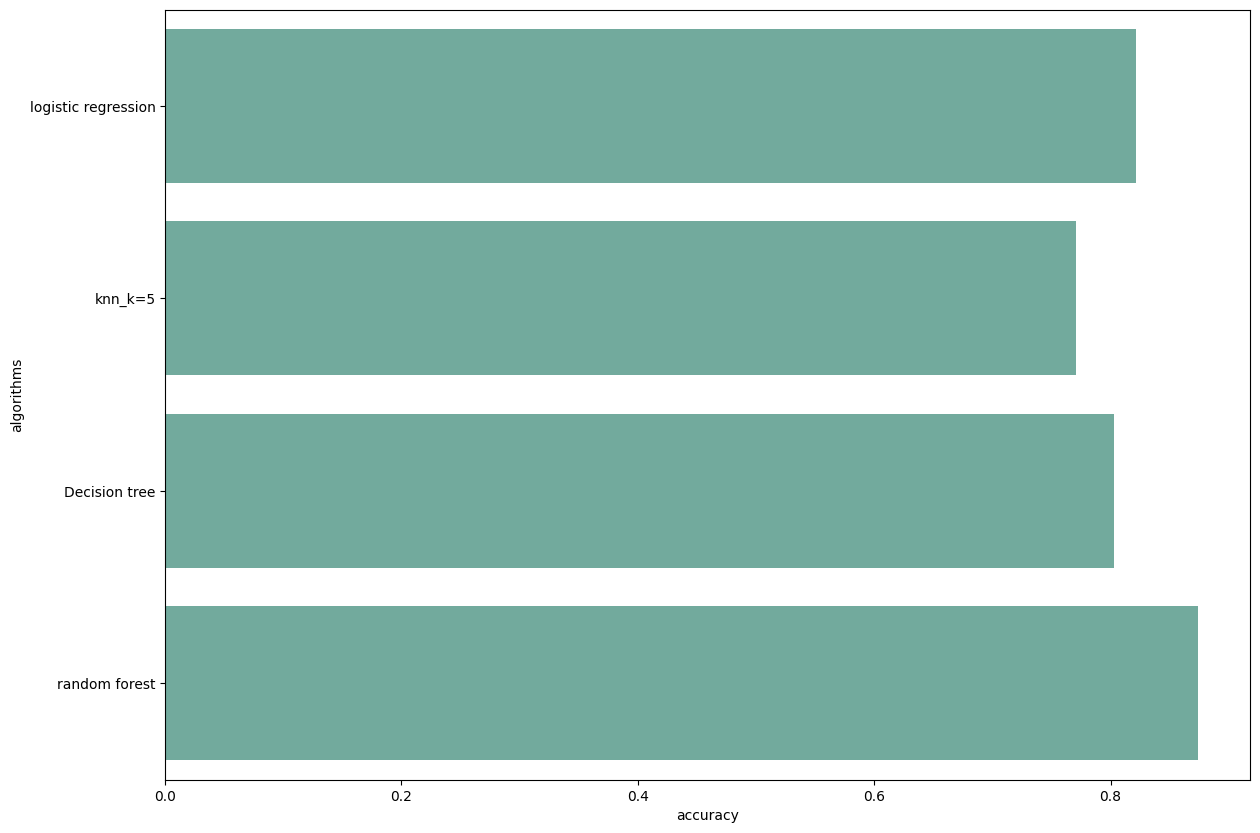

In [70]:

plt.figure(figsize=(14, 10))

# plot a bar chart
sns.barplot( y="algorithms",  x="accuracy", data=df1,  estimator=sum,  ci=None,   color='#69b3a2');